<h1>Medidas de dispersión</h1>
<h3>Descripción por datos</h3>
<p>Podemos describir nuestras muestras extrayendo datos como los cuartiles, máximos y mínimos, mediana, promedio, desviación standard. </p>


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/cars_depurado.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,156,490


In [ ]:
# Rango 
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [ ]:
# Cuartiles
mediana = df['price_usd'].median() # Q2 --> 50% de los datos quantile(q=0.5)

# método quantile(q=0-1) según el valor del parámetro q, sabremos en qué parte de la subdivisión
# de la distribución de datos estamos
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)

# valores mínimos y máximo
min_val = df['price_usd'].quantile(q=0) # df['price_usd'].min()
max_val = df['price_usd'].quantile(q=1) # Q4 -> df['price_usd'].max()

print(f'Min = {min_val} - Q1 = {Q1} - Q2 = {mediana} - Q3 = {Q3} - Q4 = {max_val}')

Min = 1.0 - Q1 = 2100.0 - Q2 = 4800.0 - Q3 = 8990.0 - Q4 = 50000.0


In [ ]:
# RANGO INTERCUARTIL -> IQR
iqr = Q3 - Q1
iqr

6890.0

In [ ]:
# VARIANZA 
# Tomamos el cuadrado de la distancia entre la media y un punto cualquiera del set de datos
# Hacemos el promedio de todas esas distancias.
# Tomamos los cuadrados para evitar los valores negativos. Así obtenemos la VARIANZA

# Desviación standard --> raíz cuadrada de la varianza
df['price_usd'].std()


6428.1520182029035

<h3>Límites para detección de valores anómalos</h3>
<p>Datos entre <code><mark>Q<sub>1</sub> - 1,5 x IQR</mark></code> y <code><mark>Q<sub>3</sub> + 1,5 x IQR</mark></code>

In [ ]:
# RECORDAMOS: este método se utiliza SI TUVIÉRAMOS una distribución normal
minlimit = Q1 - 1.5 * iqr
maxlimit = Q3 + 1.5 * iqr
print(minlimit, maxlimit)

-8235.0 19325.0


<h4>Visualizaciones</h4>
Son la otra rama importante de la estadística descriptiva.

<AxesSubplot: xlabel='price_usd', ylabel='engine_type'>

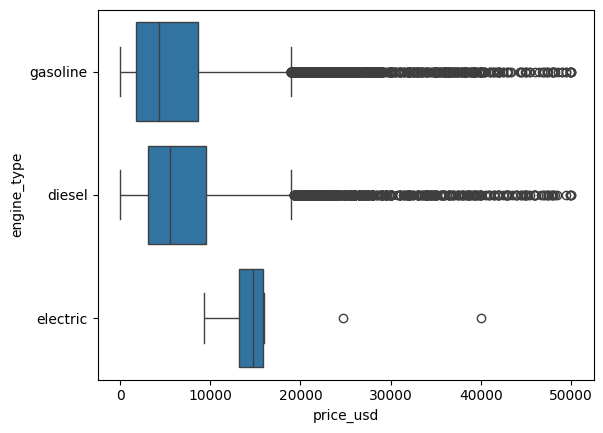

In [ ]:
# probamos con variables categóricas para ver el tipo de distribución de los 
# datos cuando relacionamos el tipo de motor con el precio
# seaborn.boxplot(y=variable_categórica, x=variable_numérica, data=df)
sns.boxplot(y='engine_type', x='price_usd', data=df)

<AxesSubplot: xlabel='price_usd', ylabel='year_produced'>

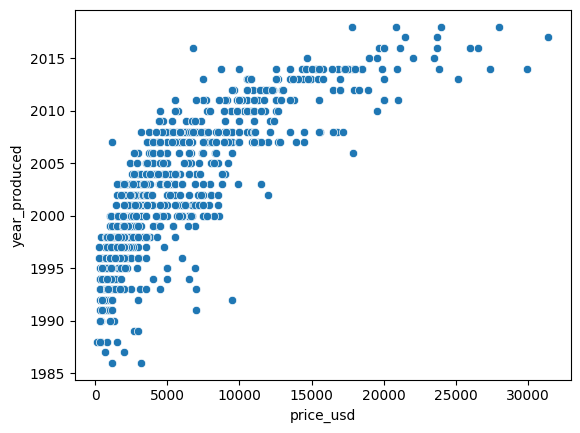

In [ ]:
# DIPERSIÓN
# scatterplot 
dfM = df[(df['manufacturer_name'] == 'Mitsubishi')]
#dfM

#dfN = df[(df['ventas]>=500000) & (df['ventas]<=1000000)] 


sns.scatterplot(data=dfM, x='price_usd', y='year_produced')

<AxesSubplot: xlabel='price_usd', ylabel='Count'>

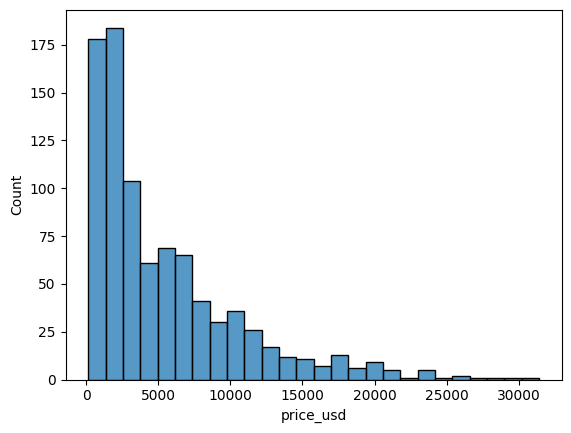

In [ ]:
sns.histplot(dfM['price_usd']) # veo la distribución de los precios

<AxesSubplot: xlabel='price_usd'>

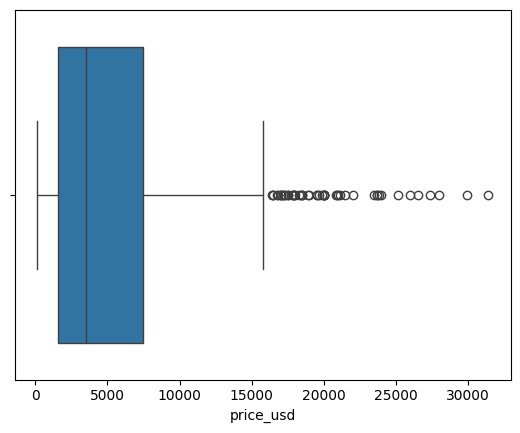

In [ ]:
#CAJAS y BIGOTES
sns.boxplot(x='price_usd', data=dfM)


In [ ]:
# ¿Cuál es la desviación standard de c/u de las variables? 
dfM.std()

TypeError: could not convert string to float: 'Mitsubishi'

In [ ]:
EJERCICIO: calcular promedio, media, min, max, q1, q2, q3, iqr, desviación standard de precios en un df con datos de una marca de coches a elección. Graficar histograma, caja y scatterplot(precio/año)

SyntaxError: invalid syntax (2898870700.py, line 1)

Promedio: 9389.81707197139
Mediana: 6700.0
Min: 1.42
Max: 49999.0
Q1: 3400.0
Q2 (Mediana): 6700.0
Q3: 12700.0
IQR: 9300.0
Desviación estándar: 8709.625113352418


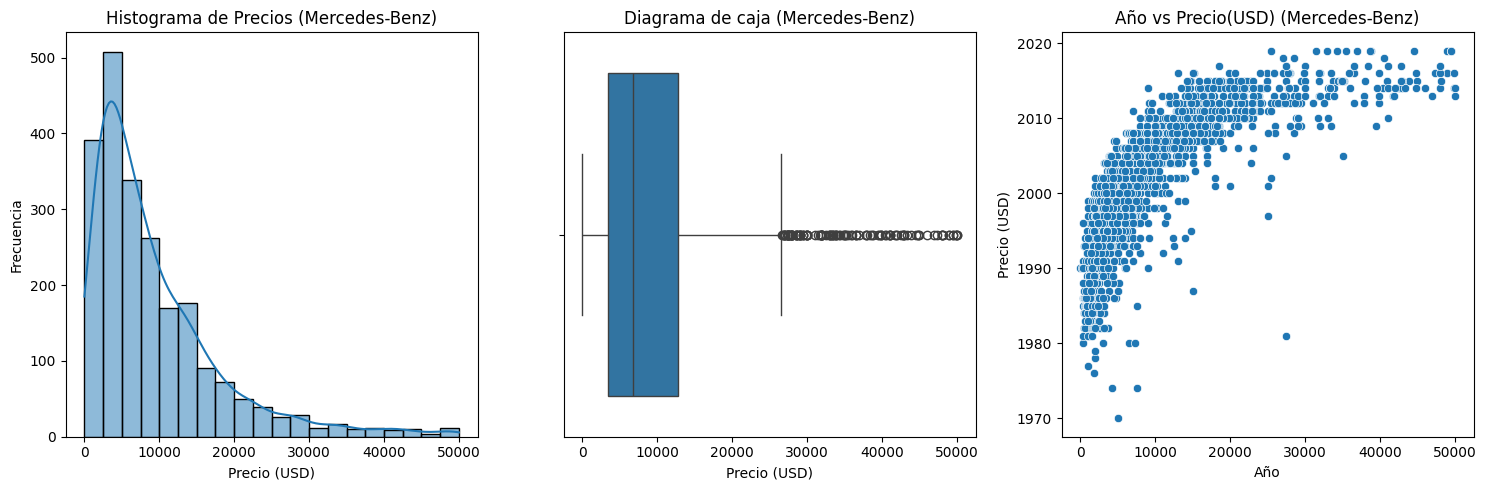

In [ ]:
# Ejecicico resuelto

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('data/cars_depurado.csv')
df_mb = df[(df['manufacturer_name'] == 'Mercedes-Benz')]

# Calculos
promedio = df_mb['price_usd'].mean()
mediana = df_mb['price_usd'].median()
min_precio = df_mb['price_usd'].min()
max_precio = df_mb['price_usd'].max()
q1 = df_mb['price_usd'].quantile(0.25)
q2 = df_mb['price_usd'].quantile(0.50)  # Mediana
q3 = df_mb['price_usd'].quantile(0.75)
iqr = q3 - q1
desviacion_std = df_mb['price_usd'].std()

# Imprimir las estadísticas
print(f"Promedio: {promedio}")
print(f"Mediana: {mediana}")
print(f"Min: {min_precio}")
print(f"Max: {max_precio}")
print(f"Q1: {q1}")
print(f"Q2 (Mediana): {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Desviación estándar: {desviacion_std}")

# Crear gráficos
plt.figure(figsize=(15, 5))

# Histograma
plt.subplot(1, 3, 1)
sns.histplot(df_mb['price_usd'], bins=20, kde=True)
plt.title('Histograma de Precios (Mercedes-Benz)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df_mb['price_usd'])
plt.title('Diagrama de caja (Mercedes-Benz)')
plt.xlabel('Precio (USD)')

# Scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_mb['price_usd'], y=df_mb['year_produced'])
plt.title('Año vs Precio(USD) (Mercedes-Benz)')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')

plt.tight_layout()
plt.show()

In [ ]:
DeepnoteChart(df_mb, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=657ca745-6eb9-4c68-96b5-44f61400fd46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>